In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [34]:
# Load the Dataset
df = pd.read_csv('house_price_data.csv')
df.head()

,SqFt Area,Price (INR in Lakhs)
0,650,30.2
1,620,29.0
2,1530,95.0
3,1500,93.0
4,1300,78.0


In [35]:
# Rename columns for simplicity
df.rename(columns={
    'Price (INR in Lakhs)': 'price',
    'SqFt Area': 'sqft'
}, inplace=True)

In [36]:
# Initial Exploration
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
df.describe()

Shape: (50, 2)
Missing Values:
 sqft     0
price    0
dtype: int64


,sqft,price
count,50.000000,50.000000
mean,1122.000000,64.904000
std,381.002973,27.894005
min,450.000000,18.500000
25%,805.000000,40.450000
50%,1125.000000,64.750000
75%,1445.000000,89.125000
max,1750.000000,112.000000


In [37]:
# Data Cleaning
df.dropna(inplace=True)

# Optional: Remove outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['sqft', 'price']]))
df = df[(z_scores < 3).all(axis=1)]

# Final cleaned dataset
print("\nCleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (50, 2)


,sqft,price
0,650,30.2
1,620,29.0
2,1530,95.0
3,1500,93.0
4,1300,78.0


In [39]:
# Train-Test Split

X = df[['sqft']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 40
Testing samples: 10


In [40]:
# Train the Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [42]:
# Evaluate the Model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 3.10
Root Mean Squared Error (RMSE): 1.76
R² Score: 1.00


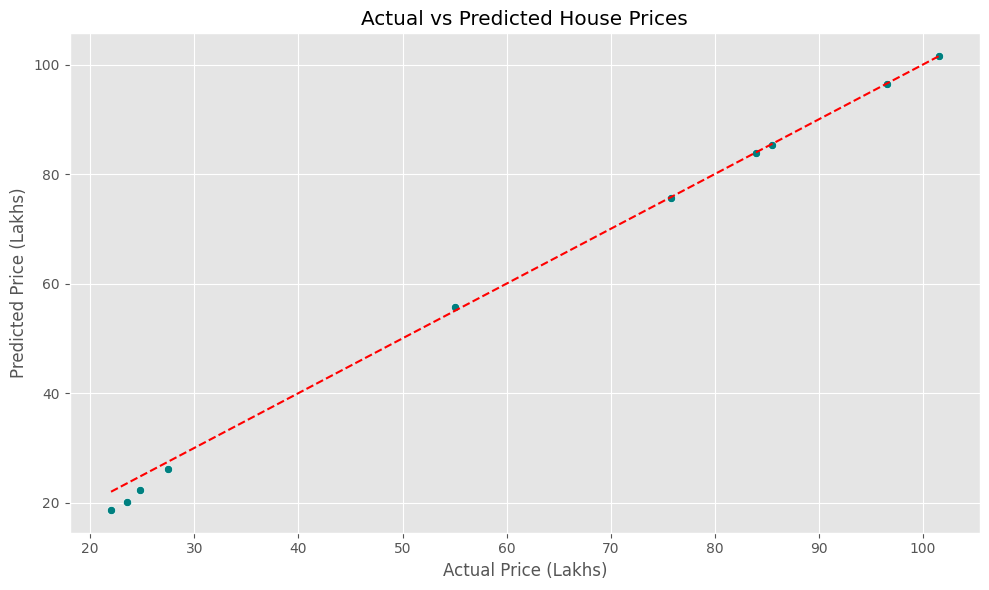

In [44]:
# 📈 Step 9: Visualization – Actual vs Predicted Prices

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()